In [1]:
from qiskit import *

In [2]:
import numpy as np
import math as m
import scipy as sci

In [3]:
S_simulator = Aer.get_backend('statevector_simulator')
M_simulator = Aer.get_backend('qasm_simulator')

In [22]:
def BlackBox_g_D(qc, qreg):
    f_type = ['f(0,1) -> (0,1)', 'f(0,1) -> (1,0)', 'f(0,1) -> 0', 'f(0,1) -> 1']
    r = int(m.floor(4*sci.rand()))
    
    if r==0:
        qc.cx(qreg[0], qreg[1])
    if r==1:
        qc.x(qreg[0])
        qc.cx(qreg[0], qreg[1])
        qc.x(qreg[0])
    if r==2:
        qc.iden(qreg[0])
        qc.iden(qreg[1])
    if r==3:
        qc.x(qreg[1])
        
    return f_type[r]
    

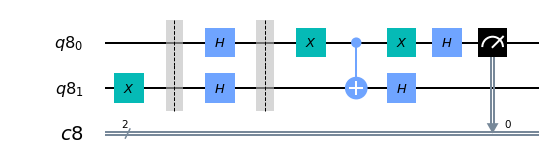

In [32]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

circuit = QuantumCircuit(qr, cr)

circuit.x(qr[1])
circuit.barrier()

circuit.h(qr[0])
circuit.h(qr[1])

circuit.barrier()

f = BlackBox_g_D(circuit, qr)

circuit.h(qr[0])
circuit.h(qr[1])

circuit.measure(qr[0], cr[0])
circuit.draw(output='mpl')

In [33]:
result = execute(circuit, backend=S_simulator, shots=1).result()
Qbit0 = list(result.get_counts(circuit).keys())[0][1]


In [34]:
if (Qbit0=='0'):
    print('f is a constant function')
else:
    print('f is a balanced function')
    
print('f: ', f)

f is a balanced function
f:  f(0,1) -> (1,0)


# Running on quantum hardware

In [30]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')

In [31]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [35]:
import qiskit.tools.jupyter
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [48]:
job = execute(circuit, backend=qcomp, shots=1)

In [49]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


In [50]:
result = job.result()
Qbit0 = list(result.get_counts(circuit).keys())[0][1]

In [51]:
if (Qbit0=='0'):
    print('f is a constant function')
else:
    print('f is a balanced function')
    
print('f: ', f)

f is a balanced function
f:  f(0,1) -> (1,0)
